In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

### 산점도 만들기

<Axes: xlabel='displ', ylabel='hwy'>

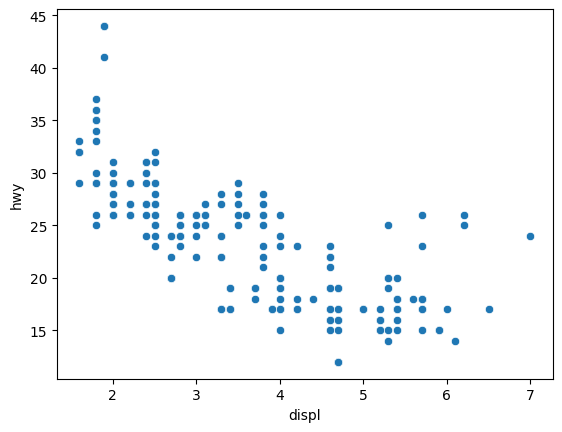

In [2]:
# x축은 displ, y축은 hwy로 된 산점도 그리기

import seaborn as sns
sns.scatterplot(data = mpg, x= 'displ', y= 'hwy')

### 축 범위 설정하기

[(3.0, 6.0)]

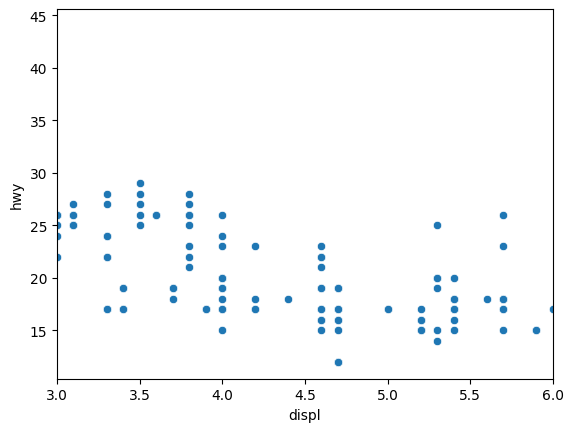

In [3]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x= 'displ', y= 'hwy')\
    .set(xlim=(3,6))

[(3.0, 6.0), (10.0, 30.0)]

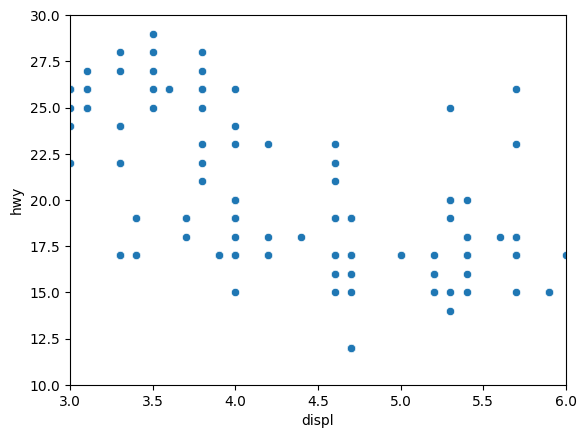

In [4]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x= 'displ', y= 'hwy')\
    .set(xlim=(3,6), ylim=(10,30))

### 종류별로 표식 색깔 바꾸기

<Axes: xlabel='displ', ylabel='hwy'>

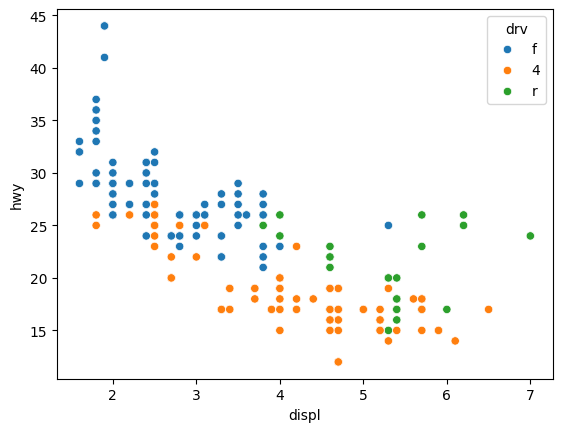

In [6]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x= 'displ', y= 'hwy', hue='drv')

### 1) 집단별 평균표 만들기

In [7]:
df_mpg = mpg.groupby('drv', as_index=False)\
    .agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


### 2) 그래프 만들기

<Axes: xlabel='drv', ylabel='mean_hwy'>

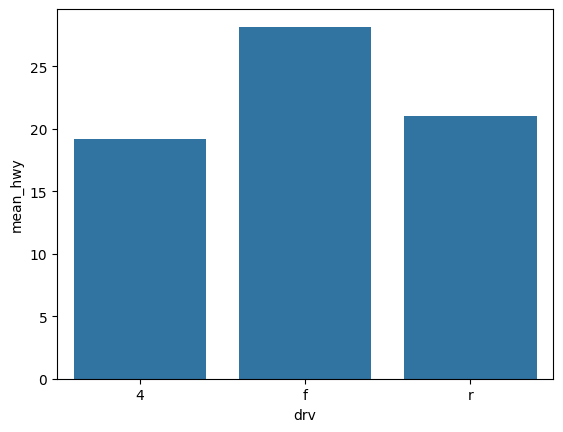

In [8]:
# drv 별 hwy 평균을 나타낸 막대 그래프
sns.barplot(data = df_mpg, x='drv', y='mean_hwy')

### 3) 크리순으로 정렬하기

<Axes: xlabel='drv', ylabel='mean_hwy'>

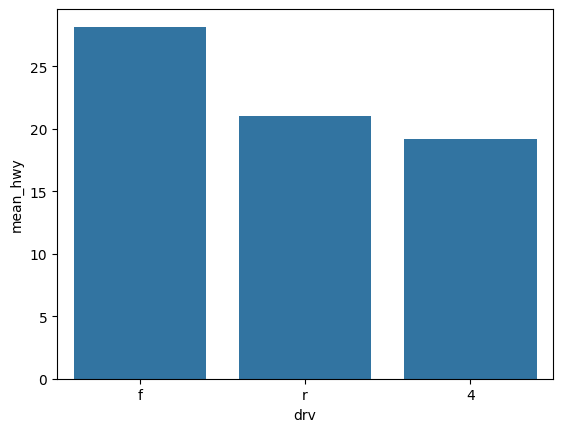

In [10]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)

sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

### 1) 집단별 빈도표 만들기

In [11]:
# 구동 방식 별 빈도를 담은 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False)\
    .agg(n=('drv', 'count'))

df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


### 2) 그래프 만들기

<Axes: xlabel='drv', ylabel='n'>

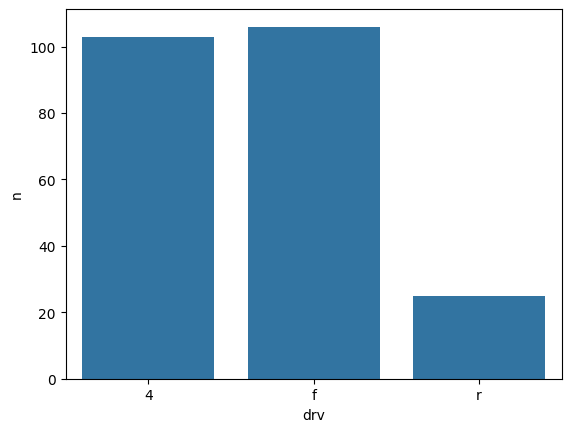

In [12]:
# drv 별 빈도를 나타낸 막대 그래프
sns.barplot(data = df_mpg, x='drv', y='n')

### +)sns.countplot()으로 빈도 막대 그래프 만들기

<Axes: xlabel='drv', ylabel='count'>

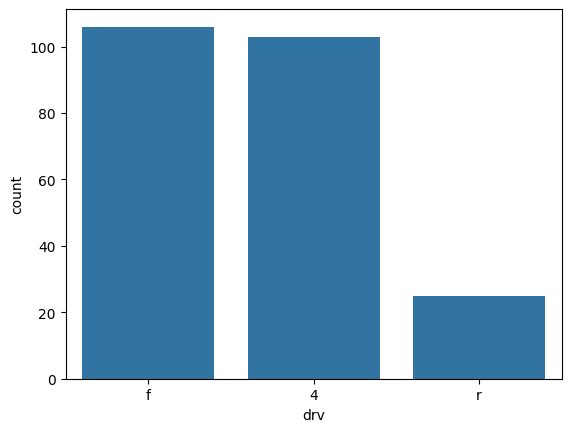

In [13]:
# 빈도 막대 그래프 만들기
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

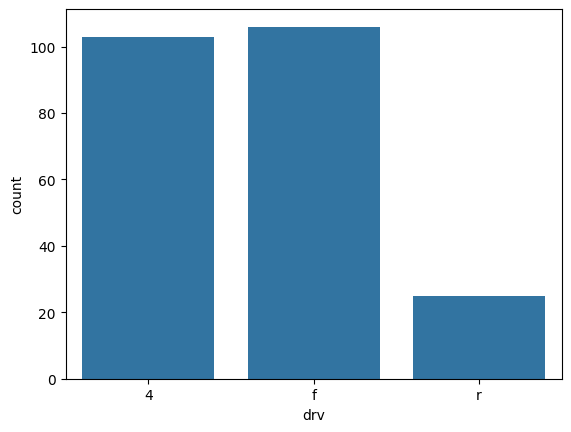

In [14]:
# 막대 정렬하기
sns.countplot(data=mpg, x='drv', order=['4', 'f', 'r']) # 4,f,r 순으로 막대 정렬

<Axes: xlabel='drv', ylabel='count'>

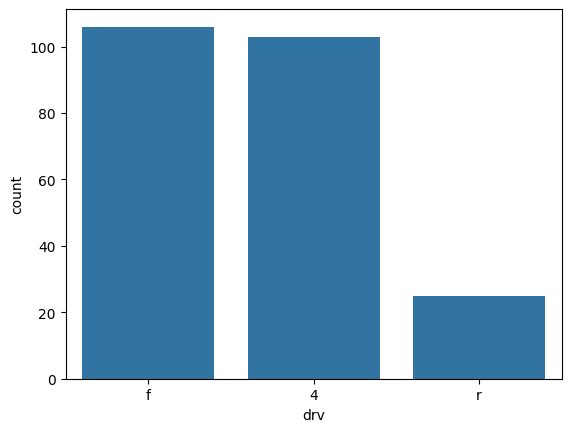

In [15]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data=mpg, x='drv',
              order=mpg['drv'].value_counts().index)

### 시계열 그래프 만들기

In [16]:
economics = pd.read_csv('economics.csv')

<Axes: xlabel='date', ylabel='unemploy'>

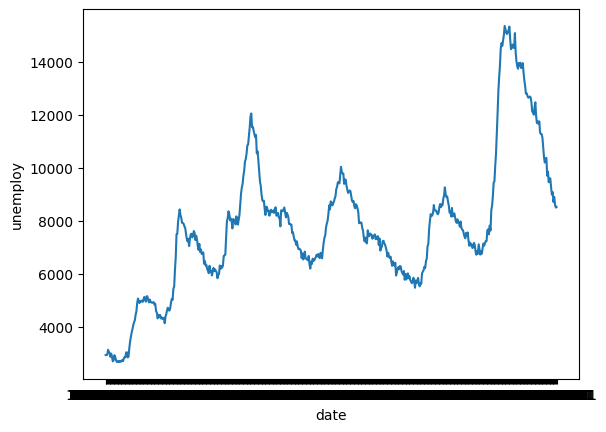

In [17]:
# x축은 시간을 나타낸 date, y축에는 실업자 수를 나타낸 unemploy로 지정
sns.lineplot(data=economics, x='date', y='unemploy')

## x축에 연도 표시하기

### 1) 날짜 시가 타입 변수 만들기

In [20]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


### 2) 연도 변수 만들기

In [21]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


### 3) x축에 연도 표시하기

<Axes: xlabel='year', ylabel='unemploy'>

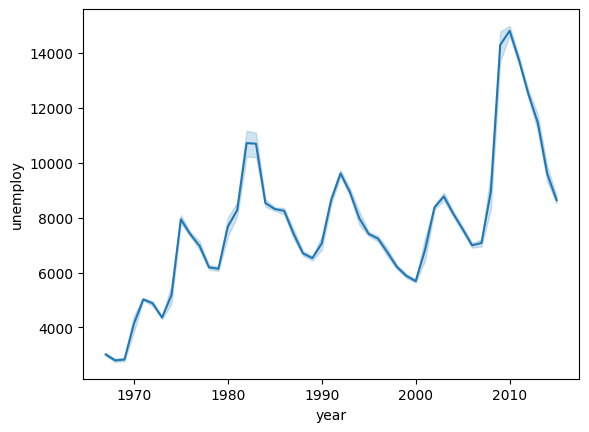

In [22]:
# x축에 연도 표시
sns.lineplot(data=economics, x='year', y='unemploy')

/var/folders/w6/pbqyx4_d3mg5y024j_kq95xm0000gn/T/ipykernel_11322/2931706787.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics, x='year', y='unemploy', ci=None)


<Axes: xlabel='year', ylabel='unemploy'>

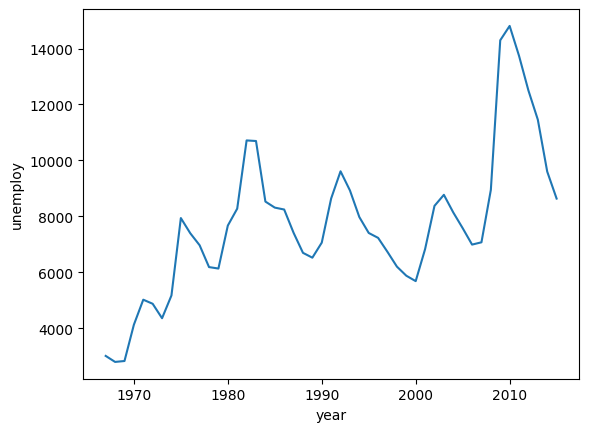

In [25]:
# 신뢰구간 제거
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)